In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


In [2]:
iris = load_iris()

X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int32)

In [3]:
per_clf = Perceptron(max_iter=1000, random_state=42)
per_clf.fit(X,y)

print(per_clf.score(X, y))

1.0


In [4]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
print(X_train_full.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


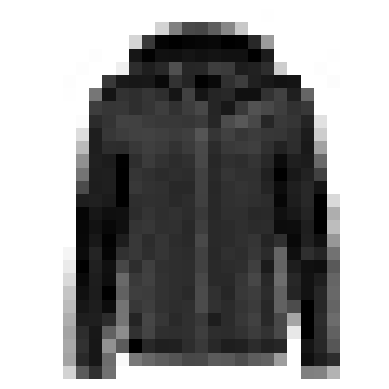

In [6]:
import matplotlib.pyplot as plt

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.

plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [7]:
print(y_train)

[4 0 7 ... 3 0 5]


In [8]:
class_name = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle Boot'
]

In [9]:
print(class_name[y_train[0]])

Coat


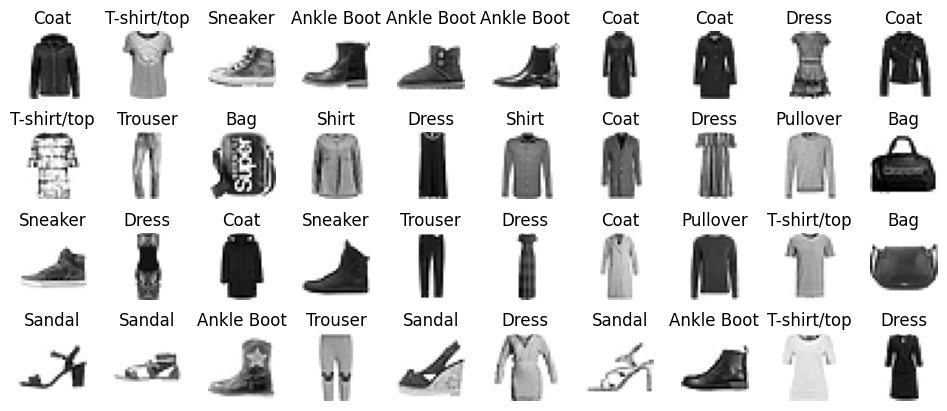

In [10]:
rows = 4
columns = 10

plt.figure(figsize=(columns * 1.2, rows * 1.2))

for row in range(rows):
    for column in range(columns):
        index = columns * row + column
        plt.subplot(rows, columns, index + 1)
        plt.imshow(X_train[index], cmap='binary')
        plt.axis('off')
        plt.title(class_name[y_train[index]])

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [11]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu')) #How many neurons you want. Here it is 300
model.add(keras.layers.Dense(100, activation='relu')) 
#model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
hidden1 = model.layers[1]

weights, biases = hidden1.get_weights()

print(str(weights) + "\n")

print(biases)

[[-0.07159911 -0.05342264 -0.07041728 ... -0.0451925  -0.00387409
  -0.04222484]
 [ 0.03656892  0.0440027   0.00170383 ...  0.01638053  0.00333565
  -0.01646657]
 [ 0.03807712 -0.04491076 -0.05591942 ...  0.06132747  0.00100119
   0.0604573 ]
 ...
 [ 0.04733078  0.01865236 -0.07342736 ... -0.00115345 -0.05542836
   0.01526644]
 [ 0.02427235  0.02508368 -0.02450504 ... -0.06076127  0.02121889
  -0.06610872]
 [ 0.06425598 -0.04928721 -0.01147635 ... -0.01431083  0.07002503
   0.00579342]]

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [14]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30


1719/1719 [==============================] - 5s 2ms/step - loss: 0.7211 - accuracy: 0.7593 - val_loss: 0.5058 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4891 - accuracy: 0.8289 - val_loss: 0.4403 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4448 - accuracy: 0.8431 - val_loss: 0.4035 - val_accuracy: 0.8604
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4155 - accuracy: 0.8549 - val_loss: 0.3938 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3962 - accuracy: 0.8614 - val_loss: 0.3831 - val_accuracy: 0.8662
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8667 - val_loss: 0.3695 - val_accuracy: 0.8682
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3668 - accuracy: 0.8713 - val_loss: 0.3588 - val_accura

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3575 - accuracy: 0.8720


[0.35752496123313904, 0.871999979019165]

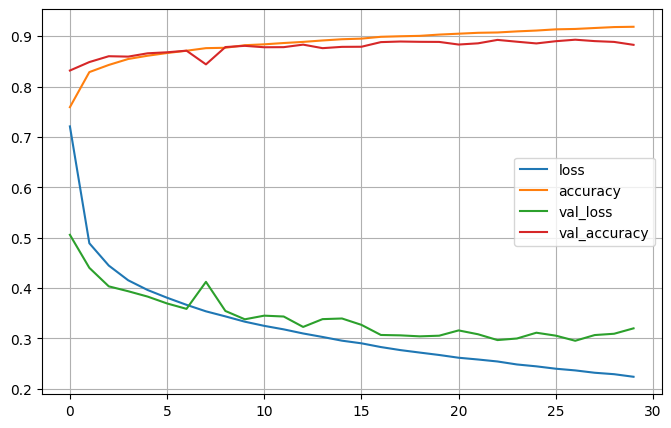

In [16]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [17]:
X_new = X_test[:3]

y_proba = model.predict(X_new)

y_proba.round(2)

1/1 [==============================] - 0s 70ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

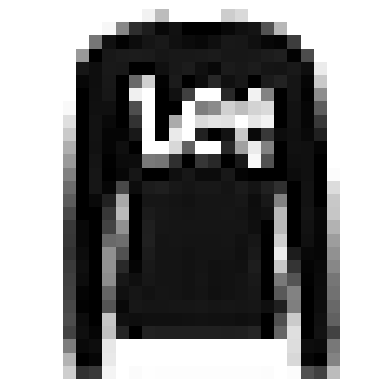

In [18]:
plt.imshow(X_new[1], cmap='binary')
plt.axis('off')
plt.show()

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [20]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [21]:
model.compile(loss='mean_squared_error', optimizer='sgd')
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Epoch 1/15
363/363 [==============================] - 1s 1ms/step - loss: 0.9308 - val_loss: 1.1826
Epoch 2/15
363/363 [==============================] - 0s 1ms/step - loss: 0.6502 - val_loss: 0.6524
Epoch 3/15
363/363 [==============================] - 0s 1ms/step - loss: 0.4926 - val_loss: 0.5589
Epoch 4/15
363/363 [==============================] - 0s 1ms/step - loss: 0.4868 - val_loss: 0.4590
Epoch 5/15
363/363 [==============================] - 0s 1ms/step - loss: 0.4336 - val_loss: 0.4417
Epoch 6/15
363/363 [==============================] - 0s 1ms/step - loss: 0.3921 - val_loss: 0.4410
Epoch 7/15
363/363 [==============================] - 0s 1ms/step - loss: 0.3853 - val_loss: 0.4314
Epoch 8/15
363/363 [==============================] - 0s 1ms/step - loss: 0.3861 - val_loss: 0.4386
Epoch 9/15
363/363 [==============================] - 0s 1ms/step - loss: 0.3799 - val_loss: 0.4299
Epoch 10/15
363/363 [==============================] - 0s 1ms/step - loss: 0.3840 - val_loss: 0.4249

In [22]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 819us/step - loss: 0.3790


In [23]:
X_new = X_test[:3]
y_new = y_test[:3]

y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 27ms/step


array([[0.6685382],
       [1.7370769],
       [4.3411303]], dtype=float32)

In [24]:
y_new

array([0.477  , 0.458  , 5.00001])

In [31]:
input_ = keras.layers.Input(X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_], outputs = [output])

In [32]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_13 (Dense)            (None, 30)                   270       ['input_5[0][0]']             
                                                                                                  
 dense_14 (Dense)            (None, 30)                   930       ['dense_13[0][0]']            
                                                                                                  
 concatenate_3 (Concatenate  (None, 38)                   0         ['input_5[0][0]',             
 )                                                                   'dense_14[0][0]']      

In [33]:
model.compile(loss='mean_squared_error', optimizer='sgd')

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

Epoch 1/15
363/363 [==============================] - 1s 1ms/step - loss: 0.7563 - val_loss: 0.8681
Epoch 2/15
363/363 [==============================] - 0s 1ms/step - loss: 0.4725 - val_loss: 0.5308
Epoch 3/15
363/363 [==============================] - 0s 1ms/step - loss: 0.7096 - val_loss: 0.5655
Epoch 4/15
363/363 [==============================] - 0s 1ms/step - loss: 0.4429 - val_loss: 2.1427
Epoch 5/15
363/363 [==============================] - 0s 1ms/step - loss: 0.9072 - val_loss: 0.5072
Epoch 6/15
363/363 [==============================] - 1s 2ms/step - loss: 0.5738 - val_loss: 5.3612
Epoch 7/15
363/363 [==============================] - 1s 2ms/step - loss: 1.3644 - val_loss: 300.7690
Epoch 8/15
363/363 [==============================] - 0s 1ms/step - loss: 4.2522 - val_loss: 9.2445
Epoch 9/15
363/363 [==============================] - 0s 1ms/step - loss: 1.9362 - val_loss: 27.5239
Epoch 10/15
363/363 [==============================] - 1s 1ms/step - loss: 3.4734 - val_loss: 19.

In [34]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [35]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_16 (Dense)            (None, 30)                   210       ['deep_input[0][0]']          
                                                                                                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_17 (Dense)            (None, 30)                   930       ['dense_16[0][0]']            
                                                                                            

In [37]:
model.compile(loss='mse', optimizer='sgd')

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=30, validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3541 - val_loss: 0.4490
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3537 - val_loss: 0.4338
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3553 - val_loss: 0.4320
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3569 - val_loss: 0.4366
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3471 - val_loss: 0.4603
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3456 - val_loss: 0.4356
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3434 - val_loss: 0.4330
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3394 - val_loss: 0.4456
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.3400 - val_loss: 0.4371
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3352 - val_loss: 0.4429